In [59]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pylab as plt
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

if 'pyodide' in sys.modules:
    import piplite
    await piplite.install('ipympl')
import ipympl
%matplotlib widget



In [60]:
iris = load_iris()
x = iris.data
y = iris.target 
colors = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [61]:
tsne = TSNE(n_components=2, verbose=0, random_state=123, init='pca', learning_rate='auto')
z = tsne.fit_transform(x) 

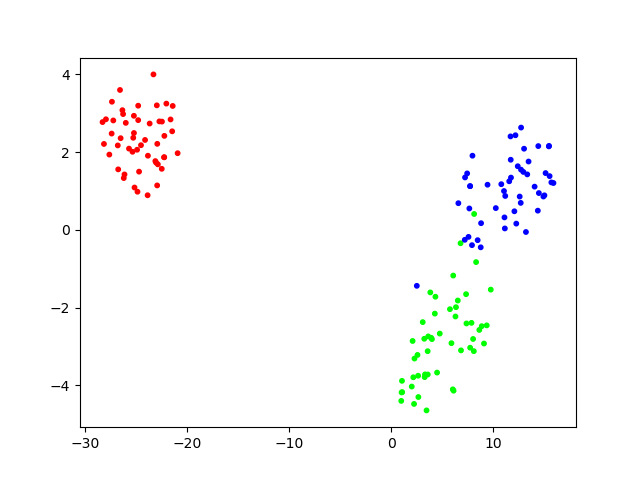

In [62]:
plt.scatter( z[:,0], z[:,1], s=10, c=colors[y,:])
plt.show()

FloatSlider(value=30.0, description='perplexity', max=30.0)

FloatSlider(value=12.0, description='early_exaggeration', max=30.0, min=1.0)

FloatSlider(value=200.0, description='learning_rate', max=400.0, min=1.0)

Output()

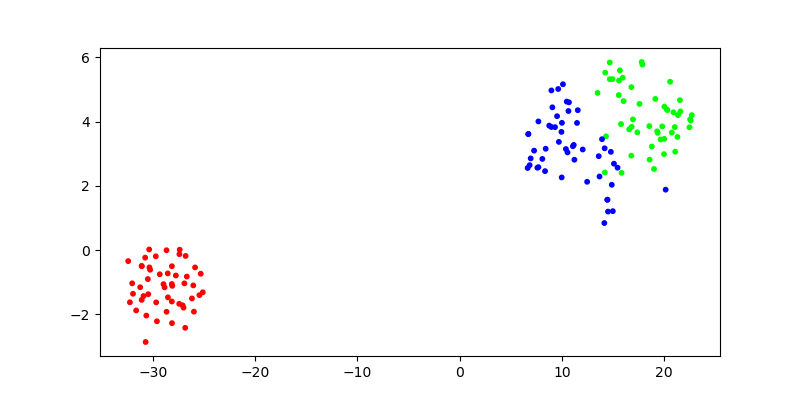

In [63]:
import ipywidgets as widgets
from IPython.display import display
output = widgets.Output()

params = {
    'perplexity' : 30,
    'early_exaggeration' : 12.0,
    'learning_rate' : 200.0
}

fig = plt.figure(figsize=(8,4))
with output:
    recompute()
def recompute():
    tsne = TSNE(n_components=2, verbose=0, random_state=123, init='pca', **params)
    z = tsne.fit_transform(x) 
    fig.clear()
    plt.scatter( z[:,0], z[:,1], s=10, c=colors[y,:])
    with output:
        fig.canvas.draw()
        
w_perplexity = widgets.FloatSlider(description='perplexity',min=0, max=30)
w_perplexity.value = params['perplexity']
def on_value(change):
    params['perplexity'] = change['new']
    recompute()
w_perplexity.observe(on_value, names='value')


w_early_exaggeration = widgets.FloatSlider(description='early_exaggeration',min=1, max=30)
w_early_exaggeration.value = params['early_exaggeration']
def on_value(change):
    params['early_exaggeration'] = change['new']                                                                               
    recompute()
w_early_exaggeration.observe(on_value, names='value')

w_learning_rate = widgets.FloatSlider(description='learning_rate',min=1, max=400)
w_learning_rate.value = params['learning_rate']
def on_value(change):
    params['learning_rate'] = change['new']                                                                               
    recompute()
w_learning_rate.observe(on_value, names='value')

display(w_perplexity,w_early_exaggeration,w_learning_rate,output)